# **PROJECT 2 : ANALISIS SENTIMEN <br>**
<br>
Kelompok 2 : <br>
1. Helda Urbhani Rosa <br>
2. Hidea Ganeta Alma Sita <br>
3. Dwi Anggun Cahyati Jamil <br>
4. Dinda Virrliana Ramadhanti <br>
5. Nabila Rasya Putri Amani <br>
6. Alyssa Imani

### **Analisis Sentimen Vaksin Covid-19 pada Sosial Media Twitter**

In [ ]:
!pip install tweet-preprocessor
!pip install google_trans_new
!pip install tweepy
!pip install textblob
!pip install wordcloud
!pip install nltk 

# 1. Crawling Data

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from datetime import timedelta, datetime
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt 
from tweepy import OAuthHandler
from textblob import TextBlob
from time import time
import preprocessor as p
import seaborn as sns
import pandas as pd
import numpy as np
import tweepy
import csv
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
consumer_key = "xxx"
consumer_secret = "xxx"
access_token = "xxx"
access_token_secret = "xxx"

# Autentifikasi Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
def scraptweets(search_words, date_since, date_until):
# Membuat Data Frame
    db_tweets = pd.DataFrame(columns=['username', 'tweetcreatedts', 'text'])

    tweets = tweepy.Cursor(
                    api.search, q=search_words, lang="en", 
                    since=date_since, until=date_until,  tweet_mode='extended').items(1000)
# Mengubah Kumpulan Data Dalam Array List
    tweet_list = [tweet for tweet in tweets]

# Melakukan Perulangan Untuk Data Tweet Untuk Dimasukkan Kedalam CSV
    for tweet in tweet_list:
        username = tweet.user.screen_name
        tweetcreatedts = tweet.created_at

        try:
            text = tweet.retweeted_status.full_text
        except AttributeError:
            text = tweet.full_text

        ith_tweet = [username, tweetcreatedts, text]

        db_tweets.loc[len(db_tweets)] = ith_tweet

# Export Data Tweet Ke File CSV    
    print('Jumlah Data', len(db_tweets))
    filename = 'vaksin_tweets.csv'
    db_tweets.to_csv(filename, index=False)
# Format Pencarian Data Tweet
today = datetime.today().strftime("%Y-%m-%d")
last_week = datetime.today() - timedelta(7)
last_week = last_week.strftime("%Y-%m-%d")

search_words = "#vaccine OR #vaccinecovid19 OR vaccine"
date_since = last_week
date_until = today

scraptweets(search_words, date_since, date_until)

Jumlah Data 1000


In [ ]:
data = pd.read_csv('/content/vaksin_tweets.csv')

In [ ]:
data

,username,tweetcreatedts,text
0,SHADOWDRAGONZ,2021-10-04 23:59:59,The same people who said they wouldn’t trust a...
1,mommydog67,2021-10-04 23:59:59,@patriottakes Not very dedicated to being a nu...
2,jmanker,2021-10-04 23:59:59,The biggest gap in #COVID19 vaccination rates ...
3,Citywide45,2021-10-04 23:59:58,BREAKING: U.S. Supreme Court Justice Sonia Sot...
4,Snozell,2021-10-04 23:59:57,"""Rep. Weyler sent the Fiscal Committee a 52 pg..."
...,...,...,...
995,KelseyDavisNews,2021-10-04 23:55:56,Southwest Airlines said its employees must get...
996,seniorchief45,2021-10-04 23:55:56,BREAKING: West Virginia governor says there is...
997,maryinwilmnc,2021-10-04 23:55:56,I’ve seen news coverage of the protests for va...
998,Gothico85H,2021-10-04 23:55:56,Why is the vaccine side effects never talked a...


In [ ]:
data.head()

,username,tweetcreatedts,text
0,SHADOWDRAGONZ,2021-10-04 23:59:59,The same people who said they wouldn’t trust a...
1,mommydog67,2021-10-04 23:59:59,@patriottakes Not very dedicated to being a nu...
2,jmanker,2021-10-04 23:59:59,The biggest gap in #COVID19 vaccination rates ...
3,Citywide45,2021-10-04 23:59:58,BREAKING: U.S. Supreme Court Justice Sonia Sot...
4,Snozell,2021-10-04 23:59:57,"""Rep. Weyler sent the Fiscal Committee a 52 pg..."


## 2. Wrangling Data

In [ ]:
import preprocessor as p
from textblob import TextBlob
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize

In [ ]:
data.isnull().sum()

username          0
tweetcreatedts    0
text              0
dtype: int64

In [ ]:
tweet = data['text']

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [ ]:
import re

In [ ]:
# remove twitter handles (@user)
data['text'] = np.vectorize(remove_pattern)(data['text'], "@[\w]*")

In [ ]:
data

,username,tweetcreatedts,text
0,SHADOWDRAGONZ,2021-10-04 23:59:59,The same people who said they wouldn’t trust a...
1,mommydog67,2021-10-04 23:59:59,Not very dedicated to being a nurse if she le...
2,jmanker,2021-10-04 23:59:59,The biggest gap in #COVID19 vaccination rates ...
3,Citywide45,2021-10-04 23:59:58,BREAKING: U.S. Supreme Court Justice Sonia Sot...
4,Snozell,2021-10-04 23:59:57,"""Rep. Weyler sent the Fiscal Committee a 52 pg..."
...,...,...,...
995,quiller_gayle,2021-10-04 23:55:58,"This is under 2% of the 76,000 person workforc..."
996,nickandbeth,2021-10-04 23:55:58,"Head's Up concertgoers! Beginning today, will..."
997,PolitMikroskopa,2021-10-04 23:55:57,BREAKING: Pentagon documents say the covid vac...
998,KariMyGirl1,2021-10-04 23:55:57,You absolutely CAN be vaccinated and oppose va...


In [ ]:
# remove special characters, numbers, punctuations
data['text'] = data['text'].str.replace("[^a-zA-Z#]", " ")

In [ ]:
data['text'] = data['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [ ]:
data

,username,tweetcreatedts,text
0,SHADOWDRAGONZ,2021-10-04 23:59:59,same people said they wouldn trust vaccine dev...
1,mommydog67,2021-10-04 23:59:59,very dedicated being nurse left because mandat...
2,jmanker,2021-10-04 23:59:59,biggest #COVID vaccination rates between Democ...
3,Citywide45,2021-10-04 23:59:58,BREAKING Supreme Court Justice Sonia Sotomayor...
4,Snozell,2021-10-04 23:59:57,Weyler sent Fiscal Committee report including ...
...,...,...,...
995,KelseyDavisNews,2021-10-04 23:55:56,Southwest Airlines said employees must vaccina...
996,seniorchief45,2021-10-04 23:55:56,BREAKING West Virginia governor says there cha...
997,maryinwilmnc,2021-10-04 23:55:56,seen news coverage protests vaccine mandates h...
998,Gothico85H,2021-10-04 23:55:56,vaccine side effects never talked about along ...


In [ ]:
ps = PorterStemmer() 

def stemming_data(x):
    return ps.stem(x)

data['text'] = data['text'].apply(stemming_data)

In [ ]:
data_tweet = list(data['text'])
polaritas = 0

sentimen = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        sentimen.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        sentimen.append('Netral')
    else:
        total_negatif += 1
        sentimen.append('Negatif')

    total += 1 
    
print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 380
Netral = 380
Negatif = 240

Total Data : 1000


In [ ]:
sentimen = pd.DataFrame({'klasifikasi': sentimen})
data['klasifikasi'] = sentimen
data.tail()

,username,tweetcreatedts,text,klasifikasi
995,KelseyDavisNews,2021-10-04 23:55:56,southwest airlines said employees must vaccina...,Netral
996,seniorchief45,2021-10-04 23:55:56,breaking west virginia governor says there cha...,Netral
997,maryinwilmnc,2021-10-04 23:55:56,seen news coverage protests vaccine mandates h...,Negatif
998,Gothico85H,2021-10-04 23:55:56,vaccine side effects never talked about along ...,Negatif
999,RealTimeCOVID19,2021-10-04 23:55:56,october million people have received least dos...,Positif


In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud) 
    plt.axis("off");

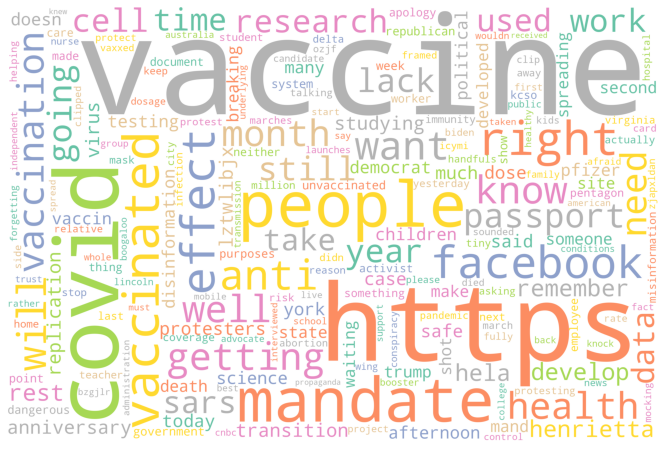

In [ ]:
all_words = ' '.join([tweets for tweets in data['text']])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(all_words)
plot_cloud(wordcloud)

## 3. Visualisasi

In [ ]:
def show_pie(label, data, legend_title) :
    fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(aspect='equal'))

    labels = [x.split()[-1] for x in label]

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}% ({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), 
                                      textprops=dict(color="w"))

    ax.legend(wedges, labels,
              title= legend_title,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    plt.show()

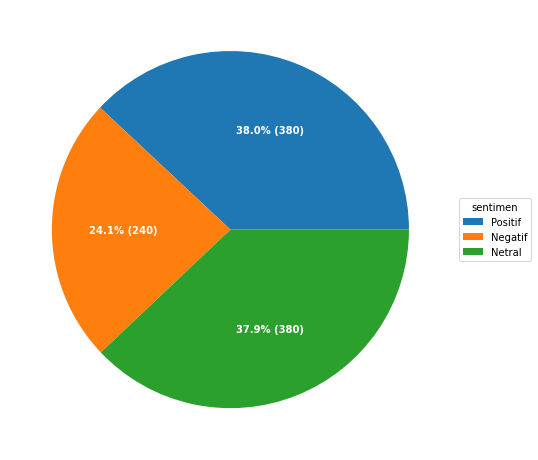

In [ ]:
label = ['Positif', 'Negatif', 'Netral']
count_data = [total_positif+1, total_negatif+1, total_netral]

show_pie(label, count_data, "sentimen")

## 4. Modelling

In [ ]:
dataset = data.drop(['username','tweetcreatedts'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

x = data['text']
y = data['klasifikasi']

In [ ]:
cv = CountVectorizer()
cou_vec = cv.fit_transform(x)
tfidf = TfidfTransformer()
corpus = tfidf.fit_transform(cou_vec)

In [ ]:
corpus

<1000x3436 sparse matrix of type '<class 'numpy.float64'>'
	with 17099 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=123)

## 5. Klasifikasi

# **Klasifikasi Data Dengan Metode Naive Bayes Classifier**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.naive_bayes import GaussianNB

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print('Akurasi Test:', cl.accuracy(dataset))

Akurasi Test: 0.865


# Klasifikasi Data dengan Metode Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier()
d_tree = d_tree.fit(x_train,y_train)

y_pred= d_tree.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('akurasi :',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

akurasi : 0.75
[[34 10  9]
 [ 1 53 13]
 [ 7 10 63]]
